In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
nash_data = pd.read_csv(
    Path("nash_laborforce.csv"), index_col="Month", infer_datetime_format=True, parse_dates=True
)
nash_data.head()

,Series ID,Year,Period,Label,Value,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
Month,,,,,,,,,,,,,
2010-01-01,LAUMT473498000000006,2010,M01,2010 Jan,855369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,LAUMT473498000000006,2010,M02,2010 Feb,857834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,LAUMT473498000000006,2010,M03,2010 Mar,863974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,LAUMT473498000000006,2010,M04,2010 Apr,876458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,LAUMT473498000000006,2010,M05,2010 May,880555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
nash_labor = nash_data[['Value']]

nash_labor.head()

,Value
Month,
2010-01-01,855369
2010-02-01,857834
2010-03-01,863974
2010-04-01,876458
2010-05-01,880555


In [4]:
nash_case_shiller = pd.read_csv(
    Path("nash_case_shiller.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)
nash_case_shiller.head()

,CSUSHPISA
DATE,
2010-01-01,147.394
2010-02-01,145.631
2010-03-01,145.859
2010-04-01,146.399
2010-05-01,146.389


In [5]:
nash_df = pd.merge(nash_labor,nash_case_shiller, left_index = True, right_index = True)

nash_df.columns = ['nash_labor_force','nash_case_shiller']

In [6]:
nash_df.head()

,nash_labor_force,nash_case_shiller
2010-01-01,855369,147.394
2010-02-01,857834,145.631
2010-03-01,863974,145.859
2010-04-01,876458,146.399
2010-05-01,880555,146.389


In [7]:
nash_unemployment = pd.read_csv(
    Path("nash_unemployment.csv"), index_col="Month", infer_datetime_format=True, parse_dates=True
)
nash_unemployment.head()

,Series ID,Year,Period,Label,Value
Month,,,,,
2010-01-01,LAUCA474000000000004,2010,M01,2010 Jan,91689
2010-02-01,LAUCA474000000000004,2010,M02,2010 Feb,89214
2010-03-01,LAUCA474000000000004,2010,M03,2010 Mar,88440
2010-04-01,LAUCA474000000000004,2010,M04,2010 Apr,82979
2010-05-01,LAUCA474000000000004,2010,M05,2010 May,81833


In [8]:
nash_unemployment = nash_unemployment[["Value"]] 

In [9]:
nash_unemployment.columns = ["nash_unemployment"]

In [10]:
nash_df = pd.merge(nash_df, nash_unemployment, left_index = True, right_index = True)

In [11]:
nash_df.head()

,nash_labor_force,nash_case_shiller,nash_unemployment
2010-01-01,855369,147.394,91689
2010-02-01,857834,145.631,89214
2010-03-01,863974,145.859,88440
2010-04-01,876458,146.399,82979
2010-05-01,880555,146.389,81833


In [12]:
nash_df['nash_labor_force_pct'] = nash_df['nash_labor_force'].pct_change()

In [13]:
nash_df['nash_case_shiller_pct'] = nash_df['nash_case_shiller'].pct_change()

In [14]:
#bring in data sets from team

In [15]:
hr_wage_nash = pd.read_csv(
    Path("hr_wage_nash.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)
hr_wage_nash.head()

,SMU47349800500000003SA
DATE,
2007-01-01,19.496529
2007-02-01,19.750042
2007-03-01,19.372021
2007-04-01,19.754380
2007-05-01,19.439147


In [16]:
hr_wage_nash.columns = ['hr_wage_nash']

In [17]:
nash_df = pd.merge(nash_df, hr_wage_nash, left_index = True, right_index = True)

In [18]:
sfr_perm_nash = pd.read_csv(
    Path("sfr_perm_nash.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)


In [19]:
sfr_perm_nash.columns = ['sfr_perm_nash.csv']

In [20]:
nash_df = pd.merge(nash_df, sfr_perm_nash, left_index = True, right_index = True)

In [21]:
nash_df

,nash_labor_force,nash_case_shiller,nash_unemployment,nash_labor_force_pct,nash_case_shiller_pct,hr_wage_nash,sfr_perm_nash.csv
2010-01-01,855369,147.394,91689,NaN,NaN,21.758227,418.150032
2010-02-01,857834,145.631,89214,0.002882,-0.011961,21.623596,346.843524
2010-03-01,863974,145.859,88440,0.007158,0.001566,21.569269,443.097642
2010-04-01,876458,146.399,82979,0.014450,0.003702,21.822696,323.745110
2010-05-01,880555,146.389,81833,0.004674,-0.000068,21.770178,247.756904
...,...,...,...,...,...,...,...
2020-10-01,1099505,229.309,73560,-0.000218,0.015450,27.940167,1281.074976
2020-11-01,1079907,232.560,49355,-0.017824,0.014177,28.355822,1281.966152
2020-12-01,1080130,235.442,53702,0.000206,0.012393,28.354970,1589.956013
2021-01-01,1077029,238.421,49808,-0.002871,0.012653,28.451445,1349.114467


In [22]:
monthly_econindex_nash = pd.read_csv(
    Path("Monthly_Nash_Econ_Index.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)

In [23]:
monthly_econindex_nash.columns = ["monthly_econindex_nash"]

In [24]:
nash_df = pd.merge(nash_df, monthly_econindex_nash, left_index = True, right_index = True)

In [25]:
weekly_nash_earnings = pd.read_csv(
    Path("Monthly_Nash_Weekly_Earnings.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)

In [26]:
weekly_nash_earnings.columns = ["weekly_nash_earnings"]

In [27]:
nash_df = pd.merge(nash_df, weekly_nash_earnings, left_index = True, right_index = True)

In [28]:
monthly_nash_weekly_hours = pd.read_csv(
    Path('Monthly_Nash_Weekly_Hours.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True
)

In [29]:
nash_df = pd.merge(nash_df, monthly_nash_weekly_hours, left_index = True, right_index = True)

In [30]:
nash_df

,nash_labor_force,nash_case_shiller,nash_unemployment,nash_labor_force_pct,nash_case_shiller_pct,hr_wage_nash,sfr_perm_nash.csv,monthly_econindex_nash,weekly_nash_earnings,Weekly_Hours
2010-01-01,855369,147.394,91689,NaN,NaN,21.758227,418.150032,2.17,772.29,35.2
2010-02-01,857834,145.631,89214,0.002882,-0.011961,21.623596,346.843524,2.76,764.90,35.2
2010-03-01,863974,145.859,88440,0.007158,0.001566,21.569269,443.097642,3.66,764.25,35.3
2010-04-01,876458,146.399,82979,0.014450,0.003702,21.822696,323.745110,4.41,780.76,35.7
2010-05-01,880555,146.389,81833,0.004674,-0.000068,21.770178,247.756904,4.36,785.16,36.0
...,...,...,...,...,...,...,...,...,...,...
2019-08-01,1086380,210.374,30712,-0.011618,0.003386,27.670806,1264.322491,3.61,979.09,35.5
2019-09-01,1088108,210.959,28341,0.001591,0.002781,27.674895,1208.818436,3.34,999.72,36.0
2019-10-01,1089760,211.552,31373,0.001518,0.002811,27.670939,1360.909353,3.17,971.17,35.2
2019-11-01,1094358,212.395,29320,0.004219,0.003985,27.620988,1261.505204,3.53,983.35,35.5


In [31]:
# end of bringing in other data sets from the team

In [32]:
nash_df.head(20)

,nash_labor_force,nash_case_shiller,nash_unemployment,nash_labor_force_pct,nash_case_shiller_pct,hr_wage_nash,sfr_perm_nash.csv,monthly_econindex_nash,weekly_nash_earnings,Weekly_Hours
2010-01-01,855369,147.394,91689,NaN,NaN,21.758227,418.150032,2.17,772.29,35.2
2010-02-01,857834,145.631,89214,0.002882,-0.011961,21.623596,346.843524,2.76,764.90,35.2
2010-03-01,863974,145.859,88440,0.007158,0.001566,21.569269,443.097642,3.66,764.25,35.3
2010-04-01,876458,146.399,82979,0.014450,0.003702,21.822696,323.745110,4.41,780.76,35.7
2010-05-01,880555,146.389,81833,0.004674,-0.000068,21.770178,247.756904,4.36,785.16,36.0
2010-06-01,887901,145.716,85996,0.008342,-0.004597,22.034571,346.503617,4.15,782.84,35.6
2010-07-01,888009,144.985,85105,0.000122,-0.005017,21.820211,276.908457,3.84,771.94,35.2
2010-08-01,884095,143.908,84396,-0.004408,-0.007428,21.970781,288.395233,3.71,773.14,35.4
2010-09-01,885992,143.011,81555,0.002146,-0.006233,21.970427,328.395110,3.83,770.70,35.0
2010-10-01,888929,142.522,80206,0.003315,-0.003419,22.199269,288.808202,3.84,771.40,35.0


In [33]:
nash_df.head()
#df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

,nash_labor_force,nash_case_shiller,nash_unemployment,nash_labor_force_pct,nash_case_shiller_pct,hr_wage_nash,sfr_perm_nash.csv,monthly_econindex_nash,weekly_nash_earnings,Weekly_Hours
2010-01-01,855369,147.394,91689,NaN,NaN,21.758227,418.150032,2.17,772.29,35.2
2010-02-01,857834,145.631,89214,0.002882,-0.011961,21.623596,346.843524,2.76,764.90,35.2
2010-03-01,863974,145.859,88440,0.007158,0.001566,21.569269,443.097642,3.66,764.25,35.3
2010-04-01,876458,146.399,82979,0.014450,0.003702,21.822696,323.745110,4.41,780.76,35.7
2010-05-01,880555,146.389,81833,0.004674,-0.000068,21.770178,247.756904,4.36,785.16,36.0


In [34]:
nash_df["case_shifted"] = nash_df["nash_case_shiller_pct"].shift(-12)

In [35]:
# another idea is to predict the price level in a year based on the features in a given month, 
# could make this rolling features if we want
# experiment with different lags

nash_df["case_shifted_actual"] = nash_df["nash_case_shiller"].shift(-12)

In [36]:
nash_df.head(10)

,nash_labor_force,nash_case_shiller,nash_unemployment,nash_labor_force_pct,nash_case_shiller_pct,hr_wage_nash,sfr_perm_nash.csv,monthly_econindex_nash,weekly_nash_earnings,Weekly_Hours,case_shifted,case_shifted_actual
2010-01-01,855369,147.394,91689,NaN,NaN,21.758227,418.150032,2.17,772.29,35.2,-0.003766,141.522
2010-02-01,857834,145.631,89214,0.002882,-0.011961,21.623596,346.843524,2.76,764.90,35.2,-0.008274,140.351
2010-03-01,863974,145.859,88440,0.007158,0.001566,21.569269,443.097642,3.66,764.25,35.3,-0.002622,139.983
2010-04-01,876458,146.399,82979,0.014450,0.003702,21.822696,323.745110,4.41,780.76,35.7,0.000171,140.007
2010-05-01,880555,146.389,81833,0.004674,-0.000068,21.770178,247.756904,4.36,785.16,36.0,-0.000757,139.901
2010-06-01,887901,145.716,85996,0.008342,-0.004597,22.034571,346.503617,4.15,782.84,35.6,-0.000315,139.857
2010-07-01,888009,144.985,85105,0.000122,-0.005017,21.820211,276.908457,3.84,771.94,35.2,-0.000930,139.727
2010-08-01,884095,143.908,84396,-0.004408,-0.007428,21.970781,288.395233,3.71,773.14,35.4,-0.003020,139.305
2010-09-01,885992,143.011,81555,0.002146,-0.006233,21.970427,328.395110,3.83,770.70,35.0,-0.004601,138.664
2010-10-01,888929,142.522,80206,0.003315,-0.003419,22.199269,288.808202,3.84,771.40,35.0,-0.005149,137.950


In [37]:
nash_df['nash_unemployment_pct'] = nash_df['nash_unemployment'].pct_change()

In [38]:
nash_df.dropna(inplace = True)

In [39]:
nash_df.head(15)

,nash_labor_force,nash_case_shiller,nash_unemployment,nash_labor_force_pct,nash_case_shiller_pct,hr_wage_nash,sfr_perm_nash.csv,monthly_econindex_nash,weekly_nash_earnings,Weekly_Hours,case_shifted,case_shifted_actual,nash_unemployment_pct
2010-02-01,857834,145.631,89214,0.002882,-0.011961,21.623596,346.843524,2.76,764.90,35.2,-0.008274,140.351,-0.026993
2010-03-01,863974,145.859,88440,0.007158,0.001566,21.569269,443.097642,3.66,764.25,35.3,-0.002622,139.983,-0.008676
2010-04-01,876458,146.399,82979,0.014450,0.003702,21.822696,323.745110,4.41,780.76,35.7,0.000171,140.007,-0.061748
2010-05-01,880555,146.389,81833,0.004674,-0.000068,21.770178,247.756904,4.36,785.16,36.0,-0.000757,139.901,-0.013811
2010-06-01,887901,145.716,85996,0.008342,-0.004597,22.034571,346.503617,4.15,782.84,35.6,-0.000315,139.857,0.050872
2010-07-01,888009,144.985,85105,0.000122,-0.005017,21.820211,276.908457,3.84,771.94,35.2,-0.000930,139.727,-0.010361
2010-08-01,884095,143.908,84396,-0.004408,-0.007428,21.970781,288.395233,3.71,773.14,35.4,-0.003020,139.305,-0.008331
2010-09-01,885992,143.011,81555,0.002146,-0.006233,21.970427,328.395110,3.83,770.70,35.0,-0.004601,138.664,-0.033663
2010-10-01,888929,142.522,80206,0.003315,-0.003419,22.199269,288.808202,3.84,771.40,35.0,-0.005149,137.950,-0.016541
2010-11-01,888624,142.167,81421,-0.000343,-0.002491,22.145508,283.715199,3.62,768.60,35.0,-0.005806,137.149,0.015148


In [40]:
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
# XGBoost

In [41]:
X = nash_df[["nash_unemployment","nash_labor_force"]]

y = nash_df[['case_shifted_actual']]

In [42]:
# # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [43]:
# Use the MinMaxScaler to scale data between 0 and 1.
# percentage do not use min max, can scale the nominal number
# percentages then use standard scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [44]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[1.        ]
  [0.        ]]

 [[0.9877322 ]
  [0.0296713 ]]

 [[0.90117606]
  [0.08999971]]

 [[0.88301211]
  [0.10979829]]

 [[0.94899512]
  [0.14529753]]] 

X_test sample values:
[[[0.15146136]
  [0.52553471]]

 [[0.13917771]
  [0.52398832]]

 [[0.29571103]
  [0.60821325]]

 [[0.28347493]
  [0.6307325 ]]

 [[0.25180689]
  [0.57943596]]]


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [46]:
# Define the LSTM RNN model.
# comment out drop out layers, when ready uncomment and run
# square the number of rows for initial numnber of units, 1000x, 2 to the power of x = 1,000,0000
# maybe add more layers
model = Sequential()

number_units = 10
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [47]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 10)             480       
_________________________________________________________________
dropout (Dropout)            (None, 2, 10)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2, 10)             840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 10)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [49]:
# general rule, # of columns, like 5
model.fit(X_train, y_train, epochs=5, shuffle=False, batch_size=1, verbose=1)

Epoch 1/5
74/74 [==============================] - 6s 3ms/step - loss: 0.0216
Epoch 2/5
74/74 [==============================] - 0s 4ms/step - loss: 0.0712
Epoch 3/5
74/74 [==============================] - 0s 3ms/step - loss: 0.0708
Epoch 4/5
74/74 [==============================] - 0s 4ms/step - loss: 0.0711
Epoch 5/5
74/74 [==============================] - 0s 4ms/step - loss: 0.0645


In [50]:
# use sklearn, pass result from prediction into the rquared
#sklearn.metrics, r squared -> add in the two parameters, 

model.evaluate(X_test, y_test)

2/2 [==============================] - 2s 4ms/step - loss: 0.2719


0.2719249129295349

In [51]:
# Make some predictions
predicted = model.predict(X_test)

In [52]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [53]:
# Create a DataFrame of Real and Predicted values
compare = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = nash_df.index[-len(real_prices): ])
compare.head(10)

,Real,Predicted
2016-04-01,188.848,162.914612
2016-05-01,189.767,162.910172
2016-06-01,190.674,162.982895
2016-07-01,191.581,162.983963
2016-08-01,192.780,162.960953
2016-09-01,193.806,162.967041
2016-10-01,194.772,162.960022
2016-11-01,195.856,162.949112
2016-12-01,197.035,162.940994
2017-01-01,198.173,162.959869


<AxesSubplot:>

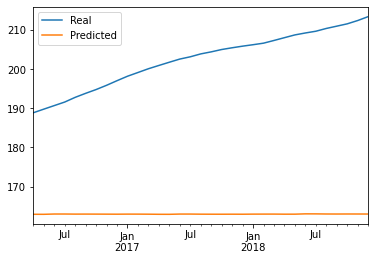

In [54]:
# Plot the real vs predicted prices as a line chart
compare.plot()

In [55]:
X = nash_df[["nash_unemployment","nash_labor_force"]]

y = nash_df[['case_shifted_actual']]

In [56]:
# # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
# Create and fit model to the data, make predictions
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)



In [59]:
y_test

,case_shifted_actual
2016-04-01,188.848
2016-05-01,189.767
2016-06-01,190.674
2016-07-01,191.581
2016-08-01,192.780
2016-09-01,193.806
2016-10-01,194.772
2016-11-01,195.856
2016-12-01,197.035
2017-01-01,198.173
